<a href="https://colab.research.google.com/github/sayan0506/Agriculture-project-notes-and-references/blob/main/Pepper_Leaf_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pepper Leaf Classifier from Plan Village Dataset


In [1]:
# install keras livelossplot
!pip -q install livelossplot

# install wandb
!pip install --upgrade wandb

# keras vis install
#!pip install --upgrade tf-keras-vis tensorflow matplotlib

     |████████████████████████████████| 2.1MB 17.3MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
     |████████████████████████████████| 133kB 56.3MB/s 
     |████████████████████████████████| 163kB 55.7MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=d908819e35dffe827cc458f2dc1345eced854e1d5a5f96991c25d3e01a2385bf
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=45d07718df07c187e8b2070ad594b8dee0692352f6fb4528186de2dcd717f7b6
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


# Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import pandas as pd
import seaborn as sns
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

import keras
from livelossplot import PlotLossesKeras
from keras.callbacks import ModelCheckpoint

from sklearn import metrics
from sklearn.metrics import confusion_matrix 
import matplotlib.cm as cm

from google.colab import files

# Improve Reproducibility

In [3]:
# improve reproducibility and make it more deterministic
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
random.seed(hash("setting random seeds") % 2**32 - 1)
np.random.seed(hash("improves reproducibility") % 2**32 - 1)
tf.random.set_seed(hash("by removing stochasticity")% 2**32 -1)


## Setup wanb environment

In [44]:
import wandb
from wandb.keras import WandbCallback

# authorize
wandb.login()

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Dataset Download

Published in: **18-04-2019**

[Plant_leaf_diseases_Mendeley_dataset](https://data.mendeley.com/datasets/tywbtsjrjv/1)

1. Download **Plant Village dataset without augmentation**

https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded


In [5]:
!wget https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded

--2021-04-03 20:28:22--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/d29ed9b2-8a5d-4663-8a82-c9174f2c7066 [following]
--2021-04-03 20:28:23--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/d29ed9b2-8a5d-4663-8a82-c9174f2c7066
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.96.147
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.96.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 868032562 (828M) [applicati

**Augmentation techniques used:**

Image flipping, Gamma correction, noise injection, PCA color augmentation, rotation and scaling.


2. Download **Plant Village dataset with augmentation**

https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded

In [6]:
!wget https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded

--2021-04-03 20:28:48--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd [following]
--2021-04-03 20:28:49--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.88.0
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.88.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 949267727 (905M) [application/z

## Unzipping

Design unzipping function



In [7]:
def unzip(zip_file, content_dir):
  if not os.path.isdir(content_dir):
    os.mkdir(content_dir)

  # unzipping
  with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(content_dir)


Unzipping the dataset with Original

In [8]:
# content directory
content_dir_1 = '/content/Plant Village Original'

# zip
zip_file_1 = '/content/file_downloaded' 

# unzip
unzip(zip_file_1, content_dir_1)

Unzipping the dataset with Augmentation

In [9]:
# content directory
content_dir_2 = '/content/Plant Village Augmented'

# zip
zip_file_2 = '/content/file_downloaded.1' 

# unzip
unzip(zip_file_2, content_dir_2)

# Data Inspection

In [10]:
# image directory without augmentation
img_dir_original = "/content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation"

# image directory with augmentation
img_dir_augmented = "/content/Plant Village Augmented/Plant_leave_diseases_dataset_with_augmentation"

Checking Pepper leaf samples category for both datasets

In [11]:
# total classifiers for original dataset
classifiers_list_original = os.listdir(img_dir_original)

# total classifiers for augmented dataset
classifiers_list_augmented = os.listdir(img_dir_augmented)

result = all(map(lambda x,y: x == y, classifiers_list_original, classifiers_list_augmented))

if result:
  print('Both dataset contains same disease classes')
  classifiers_list = classifiers_list_original
  print(f'TOtal Classifiers {len(classifiers_list)}\n')
  for i in classifiers_list:
    print(f'{i}')

else:
  print('Datasets contain different classifiers')

Both dataset contains same disease classes
TOtal Classifiers 39

Peach___healthy
Tomato___healthy
Soybean___healthy
Blueberry___healthy
Corn___healthy
Potato___healthy
Tomato___Bacterial_spot
Potato___Early_blight
Tomato___Tomato_mosaic_virus
Squash___Powdery_mildew
Corn___Common_rust
Tomato___Septoria_leaf_spot
Potato___Late_blight
Grape___healthy
Tomato___Target_Spot
Raspberry___healthy
Orange___Haunglongbing_(Citrus_greening)
Tomato___Early_blight
Background_without_leaves
Grape___Esca_(Black_Measles)
Corn___Cercospora_leaf_spot Gray_leaf_spot
Strawberry___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Cherry___Powdery_mildew
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Leaf_Mold
Cherry___healthy
Corn___Northern_Leaf_Blight
Apple___healthy
Apple___Black_rot
Apple___Cedar_apple_rust
Peach___Bacterial_spot
Grape___Black_rot
Pepper,_bell___healthy
Strawberry___Leaf_scorch
Apple___Apple_scab
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Late_blight
Pepper,_bell___Bacteri

**We are using here only the Augmented sets, as it's proven to be efficient in pevious methods and it does not do overfitting**.

## Pepper Leaf Samples

In [84]:
# Pepper Disease Classifiers
# note always define classifiers list index as the order the model has been trained, else due to index mismatch the outcome will be different
#pepper_classifiers = [disease for disease in classifiers_list if disease.split('_',',')[0] == 'Pepper']
pepper_classifiers = ['Pepper,_bell___healthy', 'Pepper,_bell___Bacterial_spot']
print(f'Total Pepper classes {len(pepper_classifiers)}, Pepper disease categories in the dataset\n{pepper_classifiers}')

Total Pepper classes 2, Pepper disease categories in the dataset
['Pepper,_bell___healthy', 'Pepper,_bell___Bacterial_spot']


Function for image to array conversion using keras  

In [85]:
def convert_img_to_array(image_path):
  try:
    img = plt.imread(image_path)
    if img is not None:
      return img_to_array(img)
    else:
      return np.array([])
  
  except Exception as e:
    print(f'Error {e}')
    return None


**Defining function for creating image array
 and labels list from the folder**

In [88]:
def fetch_img(img_dir):

  pepper_classifiers_path = [os.path.join(img_dir, disease) for disease in pepper_classifiers]
  print(f'Pepper directory names list {pepper_classifiers_path}')
  # image array list
  image_list = []
  # image labels list
  label_list = []
  # label_dataframe
  label_df = pd.DataFrame(columns=pepper_classifiers)
  # image dataframe
  img_df = pd.DataFrame(columns=['Image', 'Shape', 'Label'])

  try:
    print('\n[INFO] Loading images ...')
    # total sample count
    sample_count = 0
    for sr, pepper_disease_path in enumerate(pepper_classifiers_path):
      print(f'[INFO] Processing {pepper_classifiers[sr]}')
      sample_list = os.listdir(pepper_disease_path)
      #print(len(sample_list))
      for disease_sample in sample_list:
        # removing the .DS_store files from list, which contains the folder infos
        if disease_sample == '.DS_store':
          sample_list.remove(disease_sample)
      # categorical count
      count = 0
      for disease_sample in sample_list:
        disease_sample_path = os.path.join(pepper_disease_path, disease_sample)
        if disease_sample_path.endswith(".jpg") == True or disease_sample_path.endswith(".JPG") == True:
          img = convert_img_to_array(disease_sample_path)
          image_list.append(img)
          label_list.append(pepper_classifiers[sr])
          img_df.loc[sample_count,'Image'], img_df.loc[sample_count,'Label'] = disease_sample, pepper_classifiers[sr]
          img_df.loc[sample_count,'Shape'] = img.shape
          count += 1
          sample_count += 1
      label_df.loc[0, pepper_classifiers[sr]] = count

    return image_list, label_list, label_df, img_df   
      
  except Exception as e:
    print(f'Error {e}')
    return None

#### **Fetching Pepper images path for 2 classes for augmented dataset**

In [89]:
# main image directory with augmentation
img_dir_augmented = "/content/Plant Village Augmented/Plant_leave_diseases_dataset_with_augmentation"

print(f'Image directory with augmentation {img_dir_augmented}\n')

# fetching image array list, label_list, label_array, image_array
image_list_augmented, label_list_augmented, label_df_augmented, img_df_augmented = fetch_img(img_dir_augmented)


if len(image_list_augmented) == len(label_list_augmented):
  print('\nCheck Successful for augmented datasets')
  print(f'Total Pepper Image samples in augmented datasets {len(image_list_augmented)}\n')
  print(f'Label dataframe augmented\n')

else:
  print('Verify Dataloader or work on labelling')

label_df_augmented

Image directory with augmentation /content/Plant Village Augmented/Plant_leave_diseases_dataset_with_augmentation

Pepper directory names list ['/content/Plant Village Augmented/Plant_leave_diseases_dataset_with_augmentation/Pepper,_bell___healthy', '/content/Plant Village Augmented/Plant_leave_diseases_dataset_with_augmentation/Pepper,_bell___Bacterial_spot']

[INFO] Loading images ...
[INFO] Processing Pepper,_bell___healthy
[INFO] Processing Pepper,_bell___Bacterial_spot

Check Successful for augmented datasets
Total Pepper Image samples in augmented datasets 2477

Label dataframe augmented



Pepper,_bell___healthy Pepper,_bell___Bacterial_spot
0                   1477                          1000

In [90]:
print(f'Length of Augmented dataset {len(image_list_augmented)}')

Length of Augmented dataset 2477


## Target Analysis

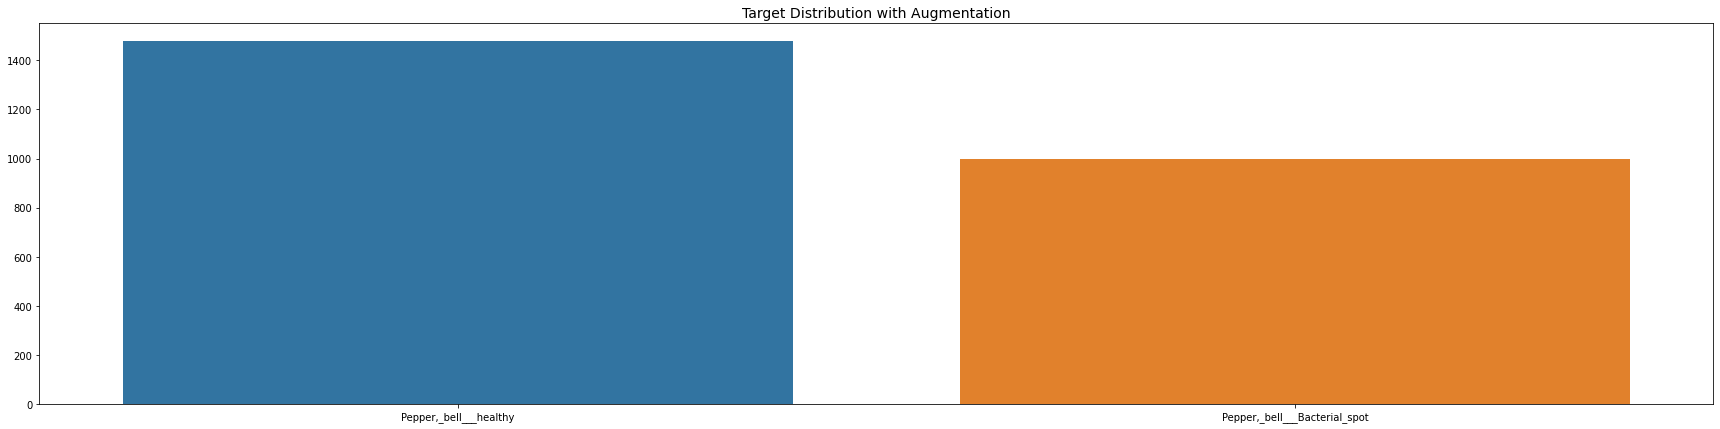

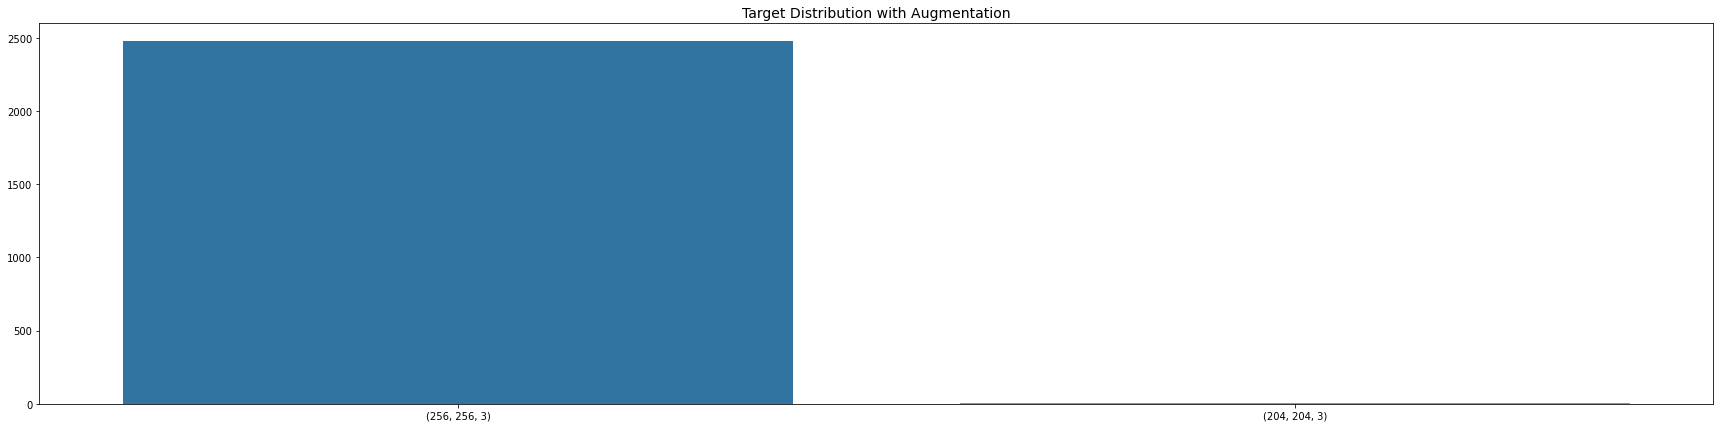

In [91]:
# target distribution visualize between original and augmented images
def distribution(counts_series_augmented):
  fig = plt.figure(figsize=(30,7))
  sns.barplot(x = counts_series_augmented.index, y = counts_series_augmented.values)
  plt.title('Target Distribution with Augmentation', fontsize=14)

# returns pandas series with classes as keys and count as values for augmented dataset
target_counts_augmented = img_df_augmented['Label'].value_counts()

# shape analysis for augmented
shape_counts_augmented = img_df_augmented['Shape'].value_counts()

# visualize target distribution
distribution(target_counts_augmented)

# visualize shapes distribution
distribution(shape_counts_augmented)

* **All the images are of similar shapes for augmented datasets (256,256,3)**


## Augmented Image Shapes EDA

Image shape comparison between different categories 

Shape          Label                        
(256, 256, 3)  Pepper,_bell___healthy           1477
               Pepper,_bell___Bacterial_spot     997
(204, 204, 3)  Pepper,_bell___Bacterial_spot       3
dtype: int64



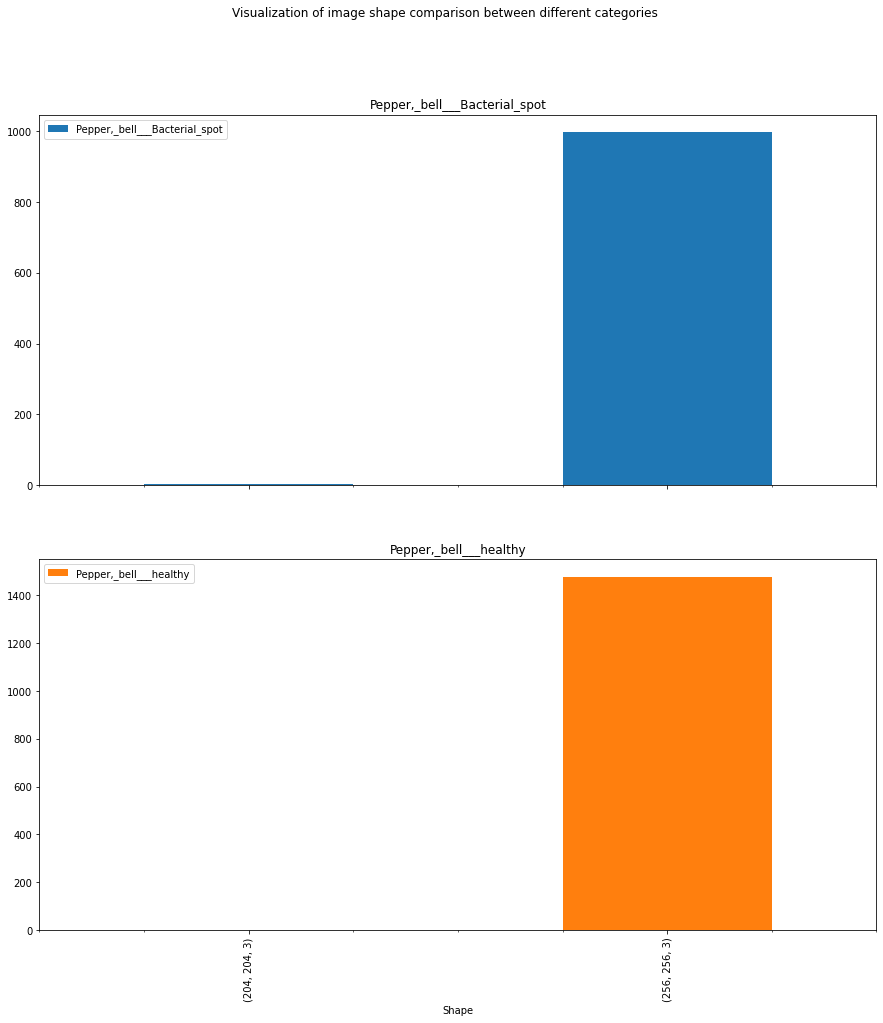

In [92]:
level_shape_df = img_df_augmented[['Shape', 'Label']].value_counts()
print(f'Image shape comparison between different categories \n\n{level_shape_df}\n')

# plotting the multi-index dataframe's hist() plot, where label, and shape are two index
level_shape_df.unstack(level = 1).plot(kind = 'bar', subplots = True, figsize = (15,15), 
                                       title = 'Visualization of image shape comparison between different categories')
plt.show()

**From the above analysis in Augmented dataset,**
* Augmented dataset contains (256,256,3) sized image samples.
* **3 samples of "Pepper Bacterial Spot" category are of size (204,204,3)**
* **Thus, we need to resize them to a default shape (256,256,3)**

## Augmented images interpolation

Here one of the two common interpolation will be used 
1. Bi-linear spline interpolation
2. Bi-cubic spline interpolation

The comparison between these interpolations will be analyzed

Image index 2245
Augmented image shape before interpolation: (204, 204, 3)



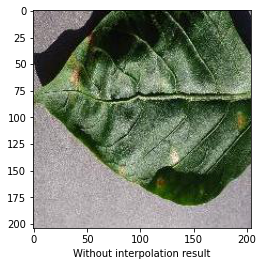

In [93]:
# random sample of augmented image of shape (204,204,3)
aug_img_indices = [sr for sr, img in enumerate(image_list_augmented) if img.shape == (204,204,3)]
a = random.choice(aug_img_indices)
print(f'Image index {a}')
img_a = image_list_augmented[a]
# sample augmented image of size (204,204,3) is used to compare the interpolations
print(f'Augmented image shape before interpolation: {img_a.shape}\n')
plt.imshow(np.array(img_a/255.0, dtype = np.float32))
plt.xlabel('Without interpolation result')
plt.show()



Interpolation checks

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


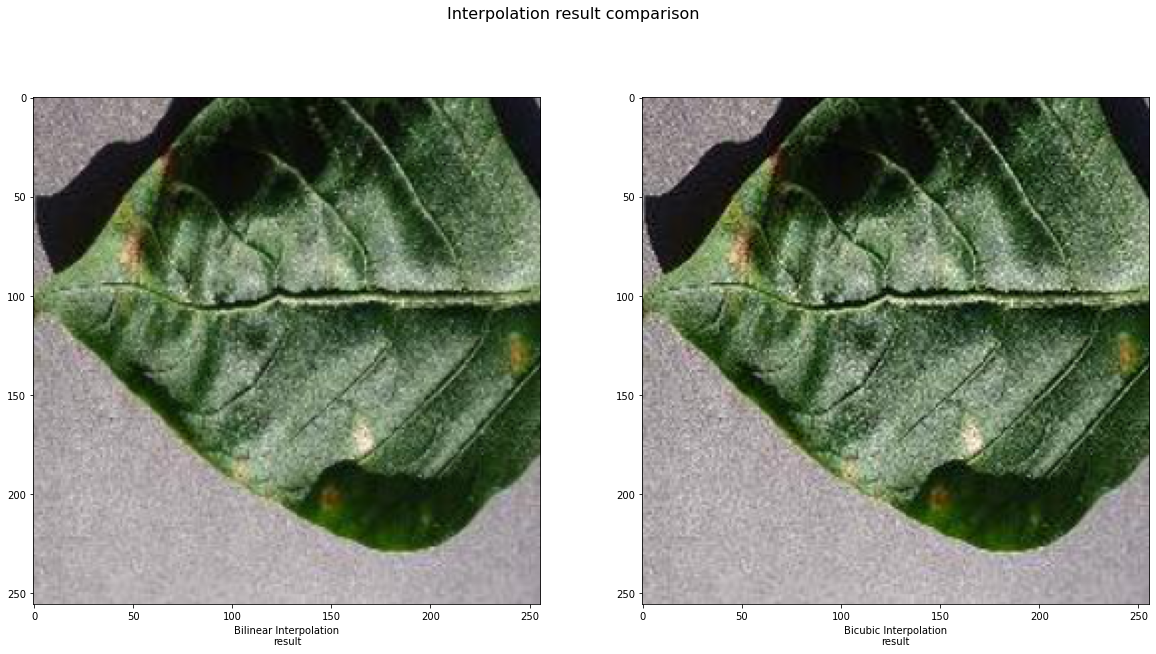

In [94]:
# applying bilinear spline interpolation
b1 = tf.keras.preprocessing.image.smart_resize(img_a, size=(256,256), interpolation='bilinear')
#b1 = np.array(b1/255.0, dtype=np.float32)

# applying bicubic spline interpolation
b2 = tf.keras.preprocessing.image.smart_resize(img_a, size=(256,256), interpolation='bicubic')
#b2 = np.array(b2/255.0, dtype=np.float32)

# visualize
fig = plt.figure(figsize = (20,10))
fig.suptitle('Interpolation result comparison', fontsize = 16)
fig.add_subplot(121)
plt.imshow(np.array(b1/255.0, dtype=np.float32))
plt.xlabel('Bilinear Interpolation\nresult')
fig.add_subplot(122)
plt.xlabel('Bicubic Interpolation\nresult')
plt.imshow(np.array(b2/255.0, dtype=np.float32))
plt.show()

Error: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
[Reference](https://www.kaggle.com/c/ann-and-dl-image-segmentation/discussion/120550)

**Review:**
It is closely observed that, cubic spline resized a bit detailed or less blurry result, so finalizing "Bi-cubic spline interpolation", for resizing augmented image samples.


# Data Preparation

#### Resizing augmented images

Fetching augmented image index to be resized along with testing

In [95]:
print(f'Augmented datasets shape analysis: \n{shape_counts_augmented}')

Augmented datasets shape analysis: 
(256, 256, 3)    2474
(204, 204, 3)       3
Name: Shape, dtype: int64


In [96]:
# index list of augmented images
augment_index_list = [i for i, image in enumerate(image_list_augmented) if image.shape==(204, 204, 3)]

# test for index list fetching
if len(augment_index_list) == shape_counts_augmented.values[1]:
  print(f'Test passed, {len(augment_index_list)} Augmented images are there in the dataset to be resized ')
else:
  print('Check steps')  

Test passed, 3 Augmented images are there in the dataset to be resized 



**Resizing images**

In [97]:
default_image_size = (256,256)
for sr in augment_index_list:
  image_list_augmented[sr] = tf.keras.preprocessing.image.smart_resize(image_list_augmented[sr], 
                                                                       size=default_image_size, interpolation='bicubic')

# storing index having image shape (204,204,3) after interpolation
augment_index_list_resized1 = [i for i, image in enumerate(image_list_augmented) if image.shape==(204, 204, 3)]
augment_index_list_resized12 = [i for i, image in enumerate(image_list_augmented) if image.shape==(256, 256, 3)]

Testing interpolation step

In [99]:
# resize check
if len(augment_index_list_resized1) == 0 and len(augment_index_list_resized12) == len(image_list_augmented):
  print('Test passed, no image leaf of size (204,204,3) in the list')
  print(f'All images have of equal shape (256,256,3) of size {len(image_list_augmented)}') 
else:
  print('Test failed, check implementation')

Test passed, no image leaf of size (204,204,3) in the list
All images have of equal shape (256,256,3) of size 2477


## Transforming image labels

In [101]:
# formatting the augmented dataset labels
image_labels_augmented = [pepper_classifiers.index(label) for label in label_list_augmented]

# sample image label

print(f'Sample formatted label: \n')
print(f'Label: {image_labels_augmented[0]}, class: {pepper_classifiers[image_labels_augmented[0]]}')
print(f'Label: {image_labels_augmented[1500]}, class: {pepper_classifiers[image_labels_augmented[1500]]}')

Sample formatted label: 

Label: 0, class: Pepper,_bell___healthy
Label: 1, class: Pepper,_bell___Bacterial_spot



## Converting images to numpy array and Normalizing

In [102]:
# numpy array for augmented image list
image_list_augmented = np.array(image_list_augmented, dtype = np.float32)/255.0

#print(f'Shape of original np dataset {image_list_original.shape}')
print(f'Shape of augmented np dataset {image_list_augmented.shape}')

Shape of augmented np dataset (2477, 256, 256, 3)


## Converting labels to numpy array

In [103]:
#image_labels_original = np.array(image_labels_original, dtype=np.int32)
image_labels_augmented = np.array(image_labels_augmented, dtype=np.int32)
#print(f'Shape of original labels {image_labels_original.shape}')
print(f'Shape of original labels {image_labels_augmented.shape}')

Shape of original labels (2477,)


## Shuffle datasets and Visualization



Defining function to visualize

In [104]:
# here we are plotting 3 figures in a row
def visualize(image_list, label_list, title=None):
  fig = plt.figure(figsize = (20,7))
  fig.suptitle(title)
  for i in range(len(pepper_classifiers)):
    sr = (i+1) * 1000
    fig.add_subplot(1,len(pepper_classifiers),i+1)
    plt.imshow(image_list[sr])
    plt.xlabel(pepper_classifiers[label_list[sr]])

Shuffling augmented dataset and visualizing

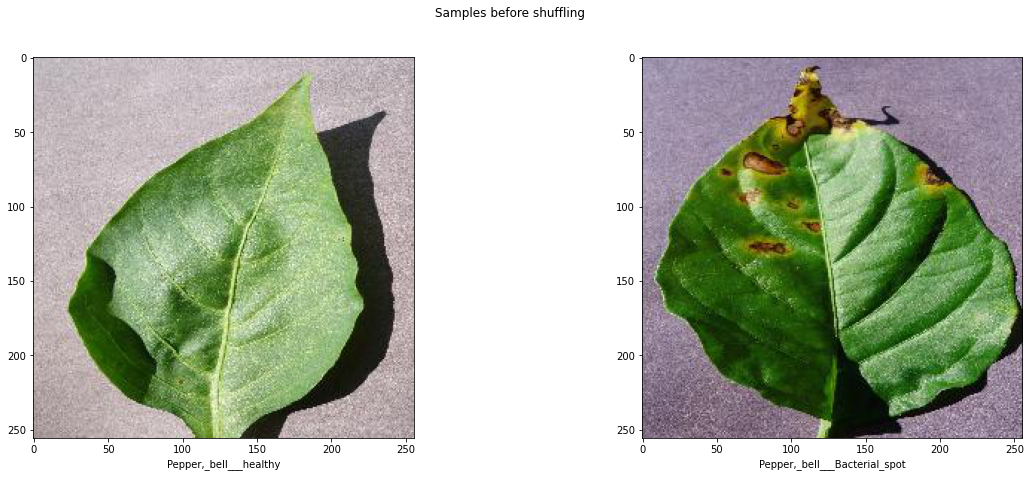

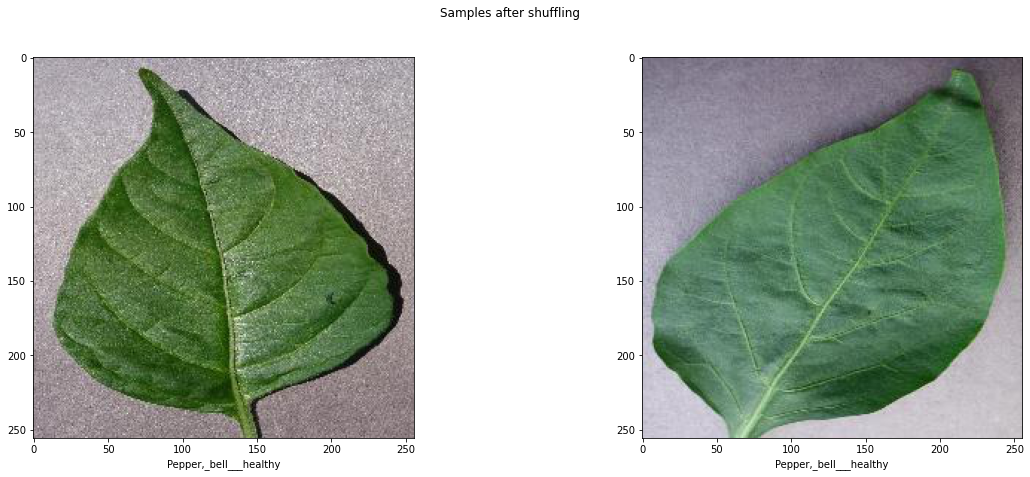

In [105]:
visualize(image_list_augmented, image_labels_augmented, title = 'Samples before shuffling')
# shuffling augmented dataset
image_list_augmented, image_labels_augmented = shuffle(image_list_augmented, image_labels_augmented)
visualize(image_list_augmented, image_labels_augmented, title = 'Samples after shuffling')

## Splitting the data into train and test set using "stratified  train_test_split"

**Splitting augmented data into train and test split with test_size = 0.1**

In [106]:
# for stratified train test split we pass y label to startify parameter=> stratify = image_labels_augmented(here)
x_train_augmented, x_test_augmented, y_train_augmented, y_test_augmented = train_test_split(image_list_augmented, image_labels_augmented,
                                                                                            stratify = image_labels_augmented, test_size = 0.10, random_state = 43)



## Summarize

In [107]:
print(f'Train shape for augmented data:\n{x_train_augmented.shape}, {y_train_augmented.shape}\n')
print(f'Test shape for augmented data:\n{x_test_augmented.shape}, {y_test_augmented.shape}\n')

# assertion checks
assert x_train_augmented.dtype == np.float32
assert x_test_augmented.dtype == np.float32
assert y_train_augmented.dtype == y_test_augmented.dtype == np.int32 
assert x_train_augmented.shape == (y_train_augmented.shape[0], 256, 256, 3) 
assert x_test_augmented.shape == (y_test_augmented.shape[0], 256, 256, 3) 

# stratified split check
assert round(len(x_train_augmented) / len(x_test_augmented)) == 9 # mention test split here 
assert len(y_train_augmented.shape) == len(y_test_augmented.shape)
print('All assertion checks are done successfully')

Train shape for augmented data:
(2229, 256, 256, 3), (2229,)

Test shape for augmented data:
(248, 256, 256, 3), (248,)

All assertion checks are done successfully


## Train and Test distribution of diffferent classes in the stratified splits

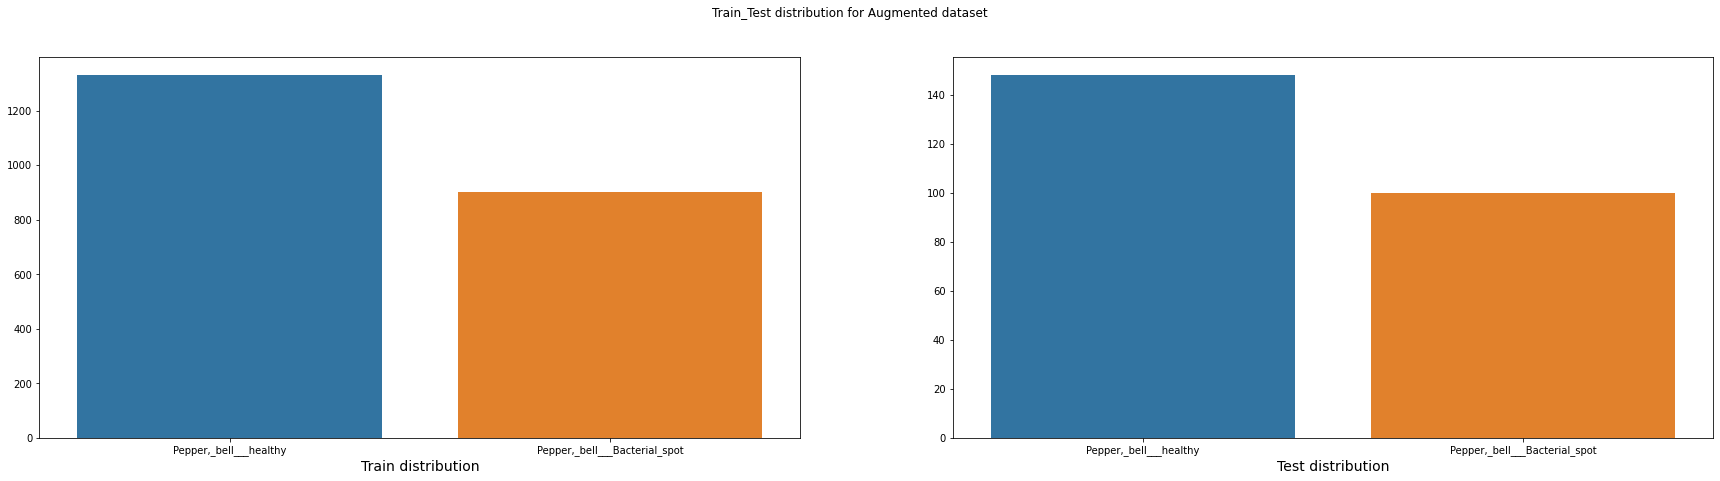

In [108]:
def train_test_distribution(y_train, y_test, label):
  class_count = [[list(y_train).count(i) for i,_ in enumerate(pepper_classifiers)],
  [list(y_test).count(i) for i,_ in enumerate(pepper_classifiers)]]
  fig = plt.figure(figsize=(30,7))
  labels = ['Train distribution', 'Test distribution']
  fig.suptitle(f'Train_Test distribution for {label} dataset')
  for i in range(2):
    fig.add_subplot(1,2,i+1)
    g = sns.barplot(x=pepper_classifiers, y = class_count[i]) 
    # display peak values on bar plot, create dataframe to do so
    #g.text(potato_classifiers[0], 800,1, color = 'black', ha = 'center')
    plt.xlabel(labels[i], fontsize = 14)

# distribution study for augmented dataset
train_test_distribution(y_train_augmented, y_test_augmented, label='Augmented')

**Note: The above plots gives the validation of perfect stratified splits**

# CNN Model Building 

Here we are implementing custom models inspired from the following paper along with additional hyperparameter tuning and testing

[Comparative Assessment of Deep Learning to Detect the Leaf Diseases of Potato based on Data Augmentation](https://ieeexplore.ieee.org/abstract/document/9200015)

In [109]:
# input image shape = (256,256,3)
input_shape = x_train_augmented[0].shape
# num_classes = 3
num_classes = len(pepper_classifiers)
print(f'Model input_shape {input_shape}')
print(f'Number of output class {num_classes}')

Model input_shape (256, 256, 3)
Number of output class 2


Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        924

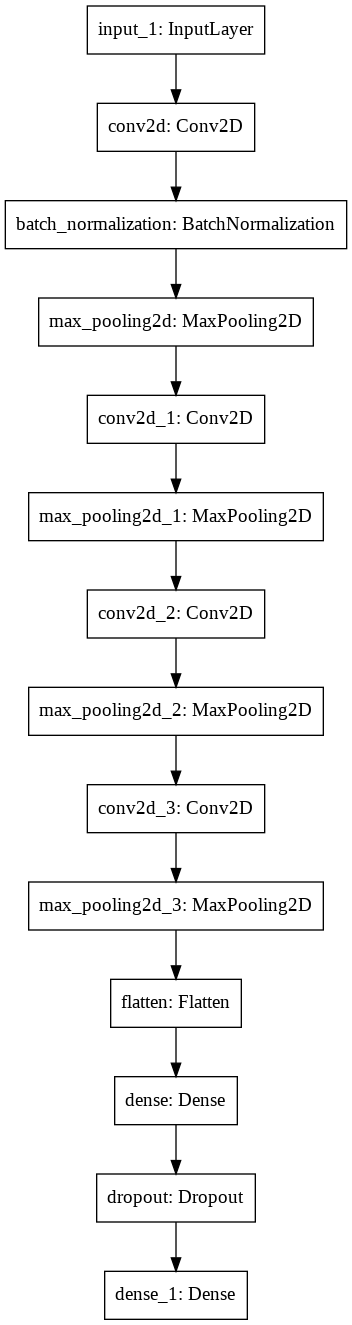

In [155]:
def model(input_shape, num_classes):
  inputs = keras.layers.Input(shape = input_shape)

  x = keras.layers.Conv2D(filters = 16, kernel_size=3, activation='relu', strides=1)(inputs)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D(pool_size=2, strides = 2)(x)
  x = keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu', strides=1)(x)
  #x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D(pool_size=2, strides = 2)(x)
  x = keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu', strides=1)(x)
  #x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D(pool_size=2, strides = 2)(x)
  x = keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu', strides=1)(x)
  #x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D(pool_size=2, strides = 2)(x)
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(512, activation='relu')(x)
  x = keras.layers.Dropout(rate = 0.3)(x)
  output = keras.layers.Dense(num_classes, activation='softmax')(x)

  return keras.models.Model(inputs = inputs, outputs = output)

model = model(input_shape, num_classes)
model.summary()
# save model structure image
plot_model(model, to_file = 'Pepper_model_cnn.png')

# Model Training

#### Defining Hyperparameters and Metadata 

In [164]:
# optimal LR
learning_rate = 0.001 # initial LR here is 1e-8
epochs = 30
batch_size = 32
loss_fn = 'sparse_categorical_crossentropy'

## Configuring wandb to initialize and log training

In [169]:
'''
 Instruction: Initialize everytime before using wandbcallback and run.join()
'''
# initialize wandb with the project

run = wandb.init(project='Pepper_disease_classifier',
                 config = {
                     "learning_rate": learning_rate,
                     "epochs": epochs,
                     "batch_size": batch_size,
                     "loss_function": loss_fn,
                     "architecture": "CNN", 
                     "dataset":"Plant Village"
                 })

config = wandb.config # will be used to configure the experiment

# clearing session
keras.backend.clear_session()

# defining the optimizer 
optimizer = Adam(config.learning_rate)
#optimizer = Adam(lr = learning_rate)
model.compile(optimizer=optimizer, loss = loss_fn, metrics = ['acc'])

**Storing initial weights of model for resetting weights**

In [158]:
# use only once after 1st compiling
model.save_weights('model_initial.h5')

Defining callbacks

In [159]:
# creating model directory to save model details
if not os.path.isdir('Model'):
  os.mkdir('Model')

# model checkpoint augmented
filepath_augmented = 'Pepper_augmented_epoch{epoch:02d}-acc {val_acc:0.4f}.hdf5'
mc_augmented = ModelCheckpoint(filepath=filepath_augmented, monitor='val_acc', save_weights_only=True,mode = 'max', verbose = 1)

# reduce Learning Rate on Plateu
# if it observes training curve(val_acc) is stuck in plateu, reduces LR by factor 0.2 with a patience = 3 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_acc',
                                                 factor = 0.2,
                                                 patience =5
                                                 )

# initially erro is too high so starting from LR 1e-01 as the initial LR
# learning rate scheduler to obtain optimum LR
# schedule is exponential decaying LR

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-03/(epoch+1))


## Training the Model with original dataset

Model training and visualizing with livelossplot

In [160]:
# clearing session
keras.backend.clear_session()

Reset weights

In [163]:
# use if when need to initialize to train from scratch
model.load_weights('model_initial.h5')
# check initialize
model.evaluate(x_train_augmented, y_train_augmented)

70/70 [==============================] - 1s 19ms/step - loss: 0.7225 - acc: 0.4038


[0.7225081920623779, 0.40376850962638855]

##### Learning rate optimization

**From the curve upto at 1e-03 the loss is least and smooth, after that it rises and diturbance starts, thus, optimal_lr = 1e-03 taken.**

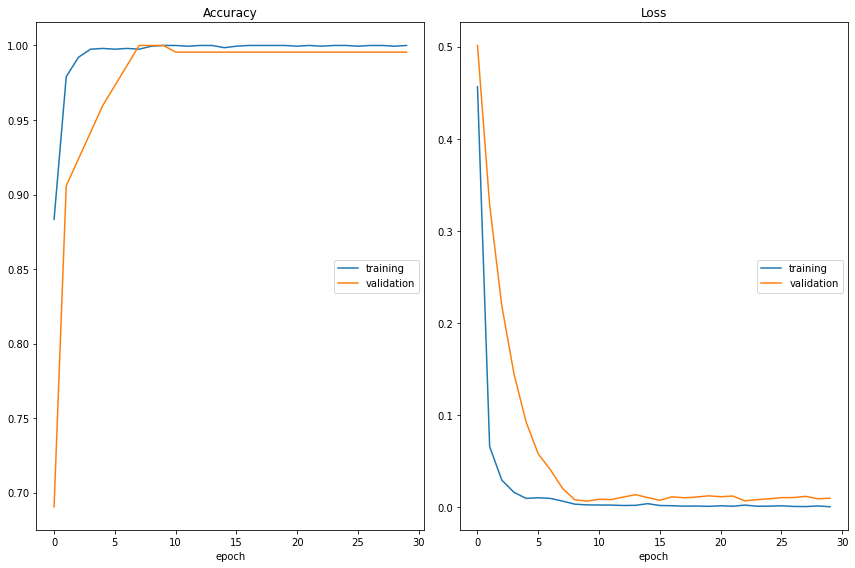

Accuracy
	training         	 (min:    0.883, max:    1.000, cur:    1.000)
	validation       	 (min:    0.691, max:    1.000, cur:    0.996)
Loss
	training         	 (min:    0.001, max:    0.457, cur:    0.001)
	validation       	 (min:    0.007, max:    0.501, cur:    0.010)

Epoch 00030: saving model to Pepper_augmented_epoch30-acc 0.9955.hdf5


In [165]:
history = model.fit(x = x_train_augmented, y = y_train_augmented, batch_size = batch_size, epochs = epochs, validation_split = 0.1, 
               verbose = 1, callbacks = [PlotLossesKeras(), mc_augmented, WandbCallback(data_type='image',
                                                                                       training_data = (x_train_augmented, y_train_augmented),
                                                                                       validation_data = (x_test_augmented, y_test_augmented),
                                                                                       labels = pepper_classifiers),
                                         lr_schedule, reduce_lr], use_multiprocessing = True)


##### Visualize learning rate scheduler output in log scale

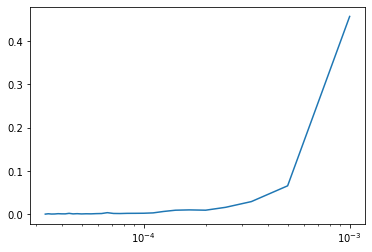

In [166]:
plt.semilogx(history.history['lr'], history.history['loss'])

#### Training report augmented

Detailed training report from WANDB

1. https://wandb.ai/sayan0506/Pepper_disease_classifier/reports/Project-Dashboard--Vmlldzo1ODE1NzQ
2. 

Load weights of best model and evaluate

[link text](https://)weights file path augmented:
"/content/drive/MyDrive/Agriculture AI/Corn Model/Corn_augmented_epoch10-acc 0.9643.hdf5"


In [170]:
weights_file = '/content/Pepper_augmented_epoch10-acc 1.0000.hdf5'
model.load_weights(weights_file)
loss, acc = model.evaluate(x_test_augmented, y_test_augmented)
print('Model evaluation trained on Augmented dataset\n')
print(f'Augmented Test Loss: {loss}, Accuracy: {acc}')

# predicted output
y_pred = model.predict(x_test_augmented)
# transforming to applicable format (m,3) to (m,)
y_pred = np.argmax(y_pred, 1)
#y_test_augmented = np.argmax(y_test_augmented, 1)
# wandb.log test analysis
wandb.log({'Test error augmented set': round((1 - acc) * 100, 2)})

run.join()

8/8 [==============================] - 0s 22ms/step - loss: 0.0254 - acc: 0.9892
Model evaluation trained on Augmented dataset

Augmented Test Loss: 0.01934446021914482, Accuracy: 0.9919354915618896


Load weights and evalucation

In [ ]:
# mount drive to load weights
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


weights file path augmented:
"/content/drive/MyDrive/Agriculture AI/Potato Model/Potato_augmented_epoch10-acc 0.98.hdf5"


**From log analysis detailed result and best epoch can be obtained which helps to pick best weight file stored using checkpoint.**

Additional testing steps:
1. Check F1 score using weights from max validation accuracy
2. Check F1 score using weights recommended by wandb
3. Compare them

Further addition in training
1. LR scheduler(more depth concepts like LR FINDER, Cyclic LR) [Reference](https://www.pyimagesearch.com/2019/08/05/keras-learning-rate-finder/)
2. Keras tuner [Reference](https://www.tensorflow.org/tutorials/keras/keras_tuner)

Future work:
WANDB sweep for detailed priority wise hyperparameter tuning

# Model Evaluation and prediction analysis

## Comparing Based on Classification Report

In [171]:
print(f'Classification Report for augmented set based model\n{metrics.classification_report(y_test_augmented, y_pred)}')
print(f'\nClassification accuracy: {metrics.accuracy_score(y_test_augmented, y_pred)*100: 0.2f}\n')

Classification Report for augmented set based model
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       100

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248


Classification accuracy:  99.19



**Conclude Augmented one from this test**

## Comparing the Confusion Matrix

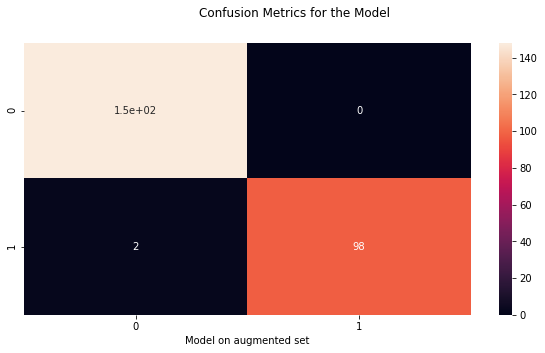

In [172]:
fig_cm = plt.figure(figsize=(10,5))
fig_cm.suptitle('Confusion Metrics for the Model')
sns.heatmap(confusion_matrix(y_test_augmented, y_pred), annot = True)
plt.xlabel('Model on augmented set')
plt.show()

* **Based on the evaluation metrics Model trained on Augmented Set is confirmed.**
* **Next goal is to check the visualization of the CNN based on GradCAM, Model Saliency Map to ensure how efficiently model pays attention to the keypoints to classify.**

# Save Model


[Reference](https://machinelearningmastery.com/save-load-keras-deep-learning-models/#:~:text=Save%20Your%20Neural%20Network%20Model%20to%20JSON&text=This%20can%20be%20saved%20to,the%20symmetrical%20load_weights()%20function)

In [177]:
print(f'Final model weights\n\"{weights_file}\"')

Final model weights
"/content/Pepper_augmented_epoch10-acc 1.0000.hdf5"


**Save Model Architecture**

In [ ]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)

Save model drive link(grant permission on request): [link](https://drive.google.com/drive/u/0/folders/1y-nmh27fHB71eO622D9qgxowI8mU-0OY)

## Evaluating Model Attention Visualization

**Algos for evaluation**

1. **GradCAM:** Visualizing the CNN last layers using Gradient Class Activation Map to understand the portion in the image, where the CNN is looking for classification.

  [Reference](https://keras.io/examples/vision/grad_cam/), Couresera CV week 4.

2. **Saliency Map:** Saliency Map helps to reprsent to pixels of the image to a different domain, thus from saliency map it's better to understand which pixels contributed to that classiification. 

  a. [Coursera Advanced CV week 4](https://www.coursera.org/learn/advanced-computer-vision-with-tensorflow/supplement/M1Td3/reference-gradcam)
  
  b. [Saliency Notebook, keras_vis detailed implementation guide](https://github.com/keisen/tf-keras-vis/blob/master/examples/attentions.ipynb)

Note: 
[Opencv Colormap guide](https://docs.opencv.org/master/d3/d50/group__imgproc__colormap.html)


#### Visualizing GadCAM

In [173]:
# implementing gradcam
def make_gradcam_heatmap(img_array, model, layer_name = None, pred_index=None):
    # if layer name is not given considering the last layer then
    last_conv_layer_name = layer_name
    if last_conv_layer_name == None:
      for layer in reversed(model.layers):
        if len(layer.output_shape) == 4:
          last_conv_layer_name = layer.name

    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    # plt.imshow(heatmap)
    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img, heatmap, save = None, cam_path=None, alpha=0.7):
    # alpha defines the percentage of overlay, alpha reduces the output will be more close to actual
    # Load the original image
    #img = keras.preprocessing.image.load_img(img_path)
    #img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    #fig = plt.figure(figsize=(10,10))
    #plt.imshow(superimposed_img)

    # Save the superimposed image if save!=None
    if save!=None:
      superimposed_img.save(cam_path)
    return superimposed_img

    # Display Grad CAM
    #display(Image(cam_path))



In [174]:
# displaying 5 images of each category
def gradcam_vis(image_index_list, image_shape = (256,256,3)):
  for sr, disease_set in enumerate(image_index_list):
    actual_img_set = x_test_augmented[disease_set]
    model_output_set = model.predict(actual_img_set)
    model_confidence_set = np.max(model_output_set, 1)*100
    model_predict_set = np.argmax(model_output_set, 1)
    #print(model_output_set)
    # obtain heatmap list and gradcam
    heatmap_set = [make_gradcam_heatmap(np.expand_dims(image_dis.reshape(image_shape), 
                                                       axis = 0), model, layer_name = None, pred_index=None) for image_dis in actual_img_set]
    overlay_set = [save_and_display_gradcam(actual_img_set[i], heatmap) for i,heatmap in enumerate(heatmap_set)]

    fig = plt.figure(figsize=(30,10))
    fig.suptitle(f'\nSample prediction result of the model of class {pepper_classifiers[sr]}', fontsize = 16)
    fig.tight_layout()
    fig.subplots_adjust(top=1.3)
    for c, idx in enumerate(disease_set):
      fig.add_subplot(1,5,c+1)
      plt.imshow(x_test_augmented[idx])
      plt.xlabel(f'Actual: {y_test_augmented[idx]}\nPredicted:{model_predict_set[c]}\nConfidence: {model_confidence_set[c]}%', fontsize = 14)
      plt.xticks([])
      plt.yticks([])
    plt.show()

    # heatmap  
    fig = plt.figure(figsize=(30,10))
    fig.suptitle(f'\nHeatmap visualization of above samples', fontsize = 16)
    fig.tight_layout()
    fig.subplots_adjust(top=1.3)
    for count,img in enumerate(heatmap_set):
      fig.add_subplot(1,5,count+1)
      plt.imshow(img, cmap = 'gray')
      plt.xticks([])
      plt.yticks([])
    plt.show()

    # gradcam  
    fig = plt.figure(figsize=(30,10))
    fig.suptitle(f'\nGradCAM visualization of above samples', fontsize = 16)
    fig.tight_layout()
    fig.subplots_adjust(top=1.3)
    for count,img in enumerate(overlay_set):
      fig.add_subplot(1,5,count+1)
      plt.imshow(img, cmap = 'gray')
      plt.xticks([])
      plt.yticks([])
    plt.show()



**Samples of each classes prediction result along with their corresponding GradCAM** 

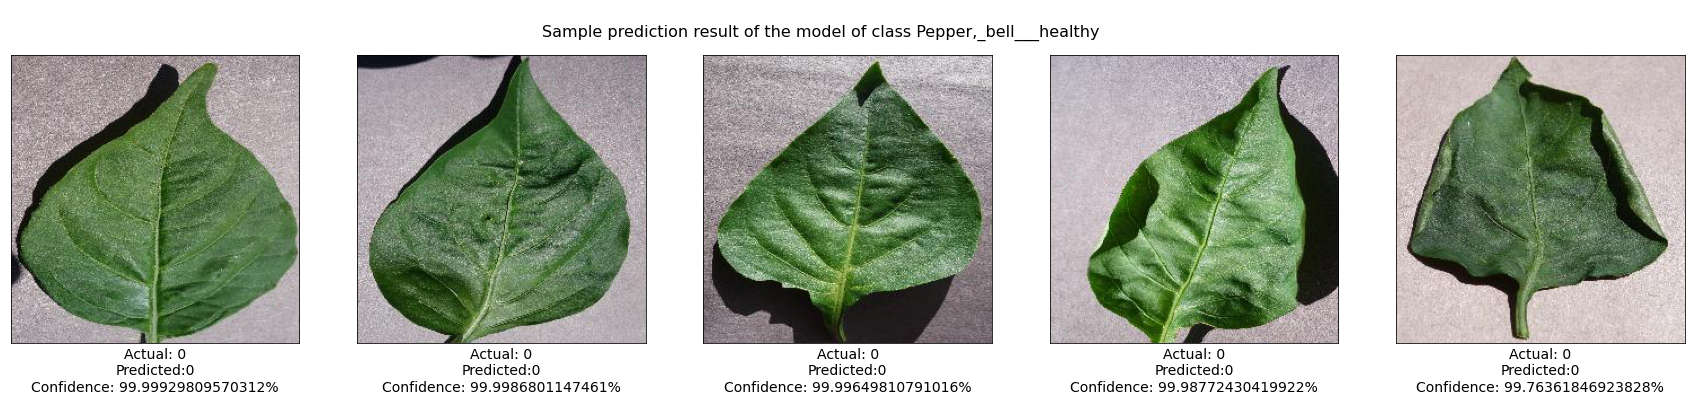

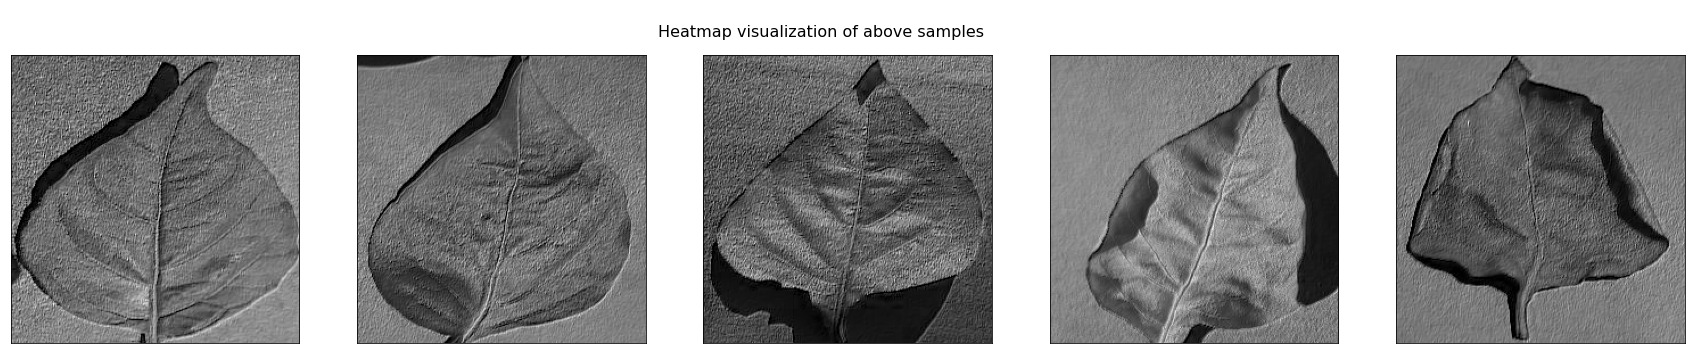

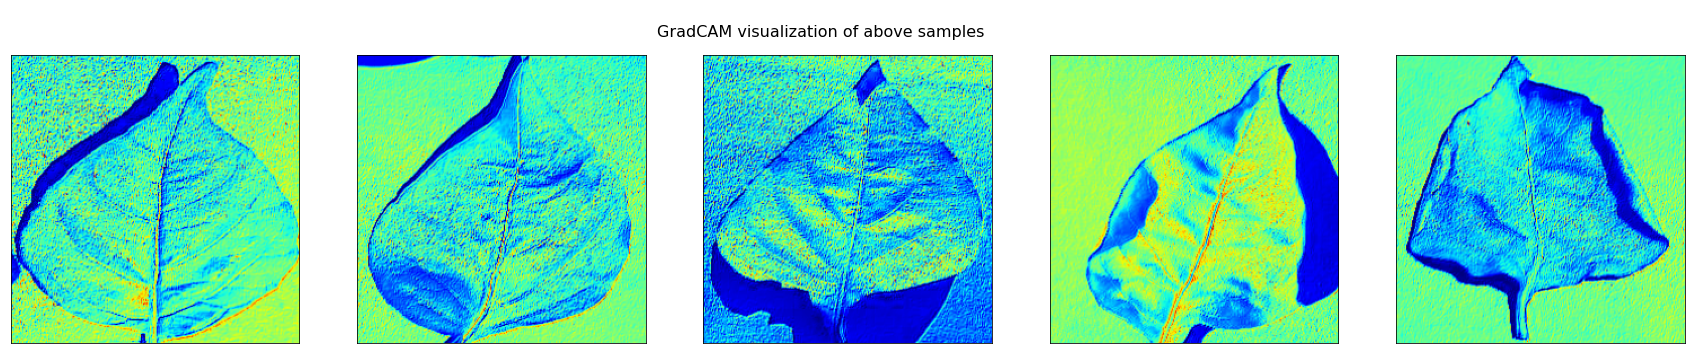

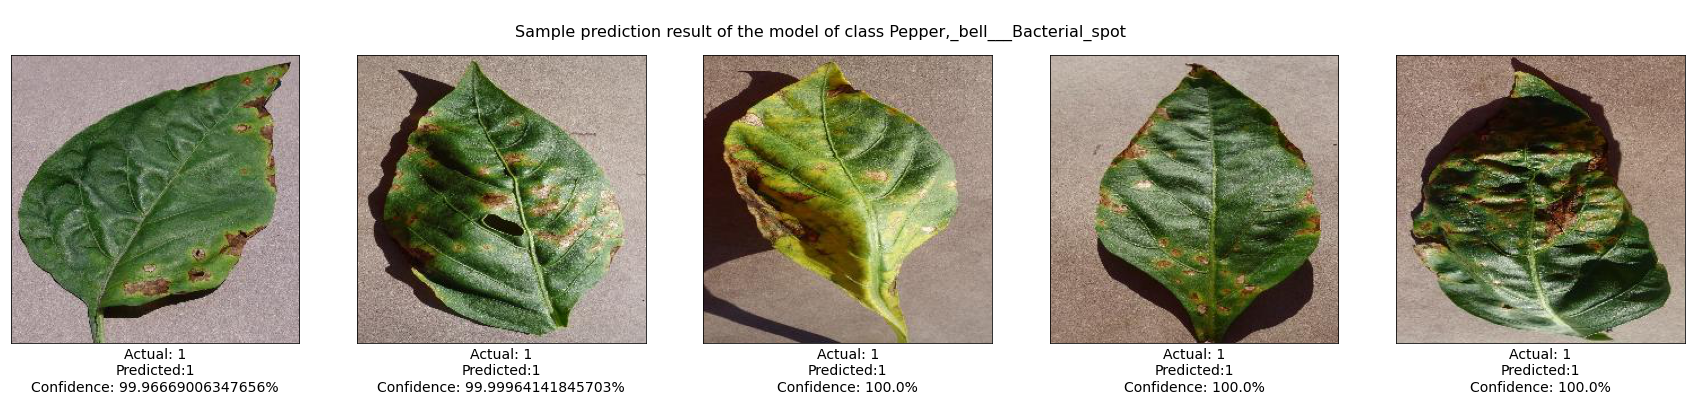

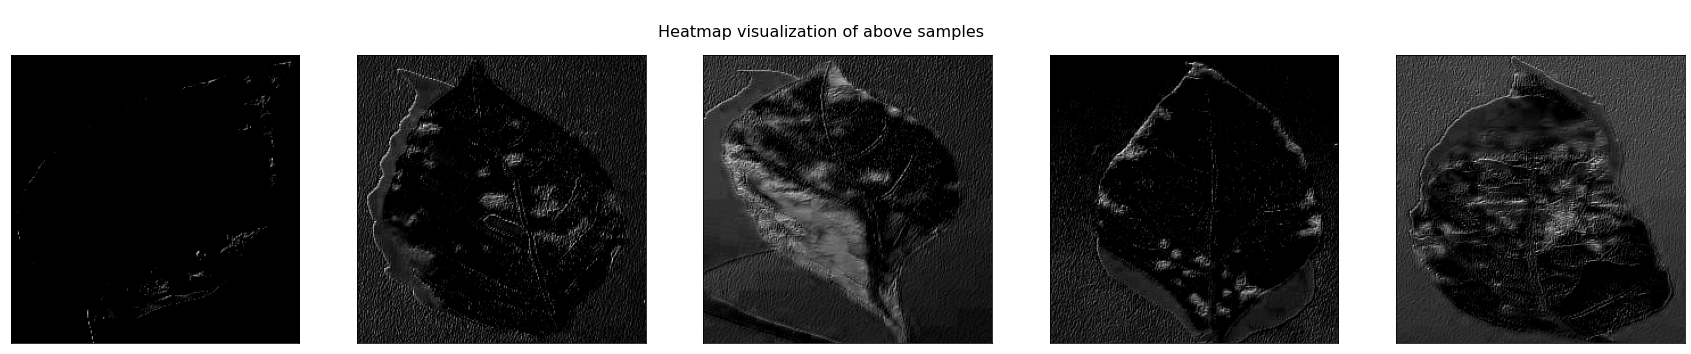

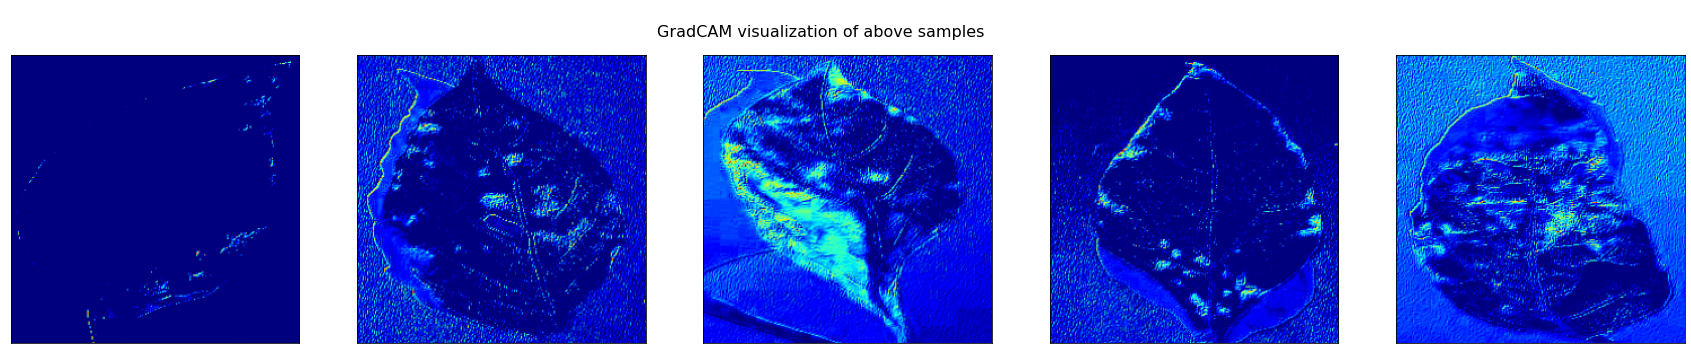

In [176]:
# fetching 5 random samples for each classes
image_index_list = [random.sample([i for i,j in enumerate(y_test_augmented) if j==sr],5) for sr, dis in enumerate(pepper_classifiers)] 

gradcam_vis(image_index_list, image_shape = (256,256,3))

# Upload and Predict Disease along with visualization

In [ ]:
from keras.preprocessing import image
def upload_vis(img, label):
  fig = plt.figure(figsize=(30,5))
  #fig.suptitle('Prediction of the uploaded samples')
  for fn in img.keys():
    path = '/content/'+fn
    img = plt.imread(path)
    img = tf.keras.preprocessing.image.smart_resize(img, size=(256,256), interpolation='bicubic')
    #img = np.array(img)
    x = image.img_to_array(img)/255.0
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    classes = model.predict(images)
    heatmap = make_gradcam_heatmap(images, model)
    overlay = save_and_display_gradcam(images.squeeze(),heatmap)
    fig.add_subplot(131)
    plt.imshow(images.squeeze())
    print(classes[0])
    plt.xlabel(f'Actual: {label}\nPredicted {peach_classifiers[np.argmax(classes[0])]}\nConfidence: {np.max(classes[0])*100}%',
               fontsize = 16)
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(132)
    plt.imshow(heatmap)
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(133)
    plt.imshow(overlay)
    plt.xticks([])
    plt.yticks([])
  plt.show()


**Sample Visualization from random images in the Internet stocks** 

In [ ]:
while True:
  status = input('Presse Y for new query, else N to exit ')
  if status.upper() == 'Y':
    label = input('Enter input image label ')
    print('Upload the query image')
    img = files.upload()
    upload_vis(img, label.upper())
  else:
    break
